In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [12]:
w, h = 40, 40

In [3]:
# open ./converted/0/hand4_0_bot_seg_5_cropped.jpeg 
pixels = np.array(Image.open('./converted/0/hand4_0_bot_seg_5_cropped.jpeg'))

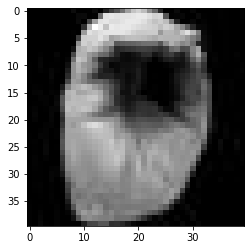

In [9]:
# dont show axes
plt.imshow(pixels, cmap='gray')

In [91]:
lamda = 0.5
alpha = 0.5

In [109]:
n_files = 0
for file in os.walk('./converted'):
    n_files += len(file[2])
n_files

700

In [126]:
X = np.zeros((n_files, w * h), dtype=np.uint8)
# y - vector
y = np.array([0] * n_files)

theta = np.zeros((1, 1))

In [129]:
X.shape

(700, 1600)

In [162]:
for i, digit_dir in enumerate(os.listdir('./converted/')):
    for j, file_name in enumerate(os.listdir('./converted/' + digit_dir)):
        pixels = np.array(Image.open('./converted/' + digit_dir + '/' + file_name))  # 40x40 image
        # add vectorized image to X
        X[i * n_files // 10 + j, :] = pixels.reshape(1, -1)
        y[i * 70 + j] = int(digit_dir)


In [166]:
hidden_layer_size = 1800
hidden_layer = np.zeros((hidden_layer_size, 1))

In [167]:
output_layer_size = 10
output_layer = np.zeros((output_layer_size, 1))

In [168]:
def predict(X, theta):
    return np.dot(X, theta)

In [169]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [174]:
def gradientDescent(X, y, theta, alpha, lamda, iters) -> np.ndarray:
    m = X.shape[0]
    for i in range(iters):
        hidden_layer = sigmoid(np.dot(X, theta))
        output_layer = sigmoid(np.dot(hidden_layer, theta.T))
        theta = theta - alpha * (np.dot(X.T, output_layer - y) + lamda * theta)
    return theta

In [173]:
def computeCost(X, y, theta, lamda) -> float:
    m = X.shape[0]
    J = 0
    hidden_layer = sigmoid(np.dot(X, theta))
    output_layer = sigmoid(np.dot(hidden_layer, theta.T))
    J = (1 / m) * np.sum(-y * np.log(output_layer) - (1 - y) * np.log(1 - output_layer)) + (lamda / (2 * m)) * np.sum(theta ** 2)
    return J